QA for the climate observations data

In [3]:
import pandas as pd
import datetime
import os.path

# format is 'YYYY-MM-DD'
analysis_date_str = '2023-09-06'
analysis_date = datetime.datetime.strptime(analysis_date_str, '%Y-%m-%d')
analysis_date_cols = ['DATE']
stations = ['1A05P', '1A14P', '1E02P']

yesterday = analysis_date - datetime.timedelta(days=1)

# coding for specific times
yesterday = yesterday.replace(hour=7, minute=00, second=00)
analysis_date = analysis_date.replace(hour=15, minute=00, second=00)

# path to the data generated by python script
date_input_str = analysis_date.strftime('%Y%m%d')
file_name = f'ASP_daily-{analysis_date_str}.csv'

proj_root = os.path.abspath(os.path.join(os.path.abspath(''), '..', '..', '..'))
if not os.path.exists:
    # hack to allow running in interactive window
    proj_root = os.path.abspath('')

# print(f"pproj_root: {proj_root}")
py_data_path = os.path.join(proj_root, 'data/asp_prepd', date_input_str, file_name)
r_data_path = os.path.join(proj_root, 'data/drain', analysis_date_str, file_name)
TA_raw_data_path = os.path.join(proj_root, 'data/asp_env', date_input_str, 'TA.csv')



#"data/asp_prepd/20230905/ASP_daily-2023-09-05.csv"
# print(f"TA_raw_data_path: {TA_raw_data_path}")

# show the raw data for the date range
df = pd.read_csv(TA_raw_data_path,
                 parse_dates=['DATE(UTC)'],
                 encoding="ISO-8859-1")
df = df.rename(columns={'DATE(UTC)': 'DATE'})

drop_cols = []
for col in df.columns:
    station_name = col.split(' ')[0]
    if station_name not in stations and col != 'DATE':
        drop_cols.append(col)

df = df.drop(columns=drop_cols)


df_date_filter = df.query('DATE > @yesterday and DATE <= @analysis_date')

df_date_filter


,DATE,1A05P Longworth Upper,1A14P Hedrick Lake,1E02P Mount Cook
8144,2023-09-05 08:00:00,6.0,7.3,7.6
8145,2023-09-05 09:00:00,5.1,7.4,8.0
8146,2023-09-05 10:00:00,4.3,7.7,8.4
8147,2023-09-05 11:00:00,3.8,7.0,10.2
8148,2023-09-05 12:00:00,3.9,6.8,9.8
8149,2023-09-05 13:00:00,3.5,6.5,8.2
8150,2023-09-05 14:00:00,3.2,6.5,7.6
8151,2023-09-05 15:00:00,2.9,6.7,7.2
8152,2023-09-05 16:00:00,3.3,6.4,7.0
8153,2023-09-05 17:00:00,3.3,7.3,7.4


/home/kjnether/rfc_proj/climate_obs/data/drain/2023-09-06/ASP_daily-2023-09-06.csv


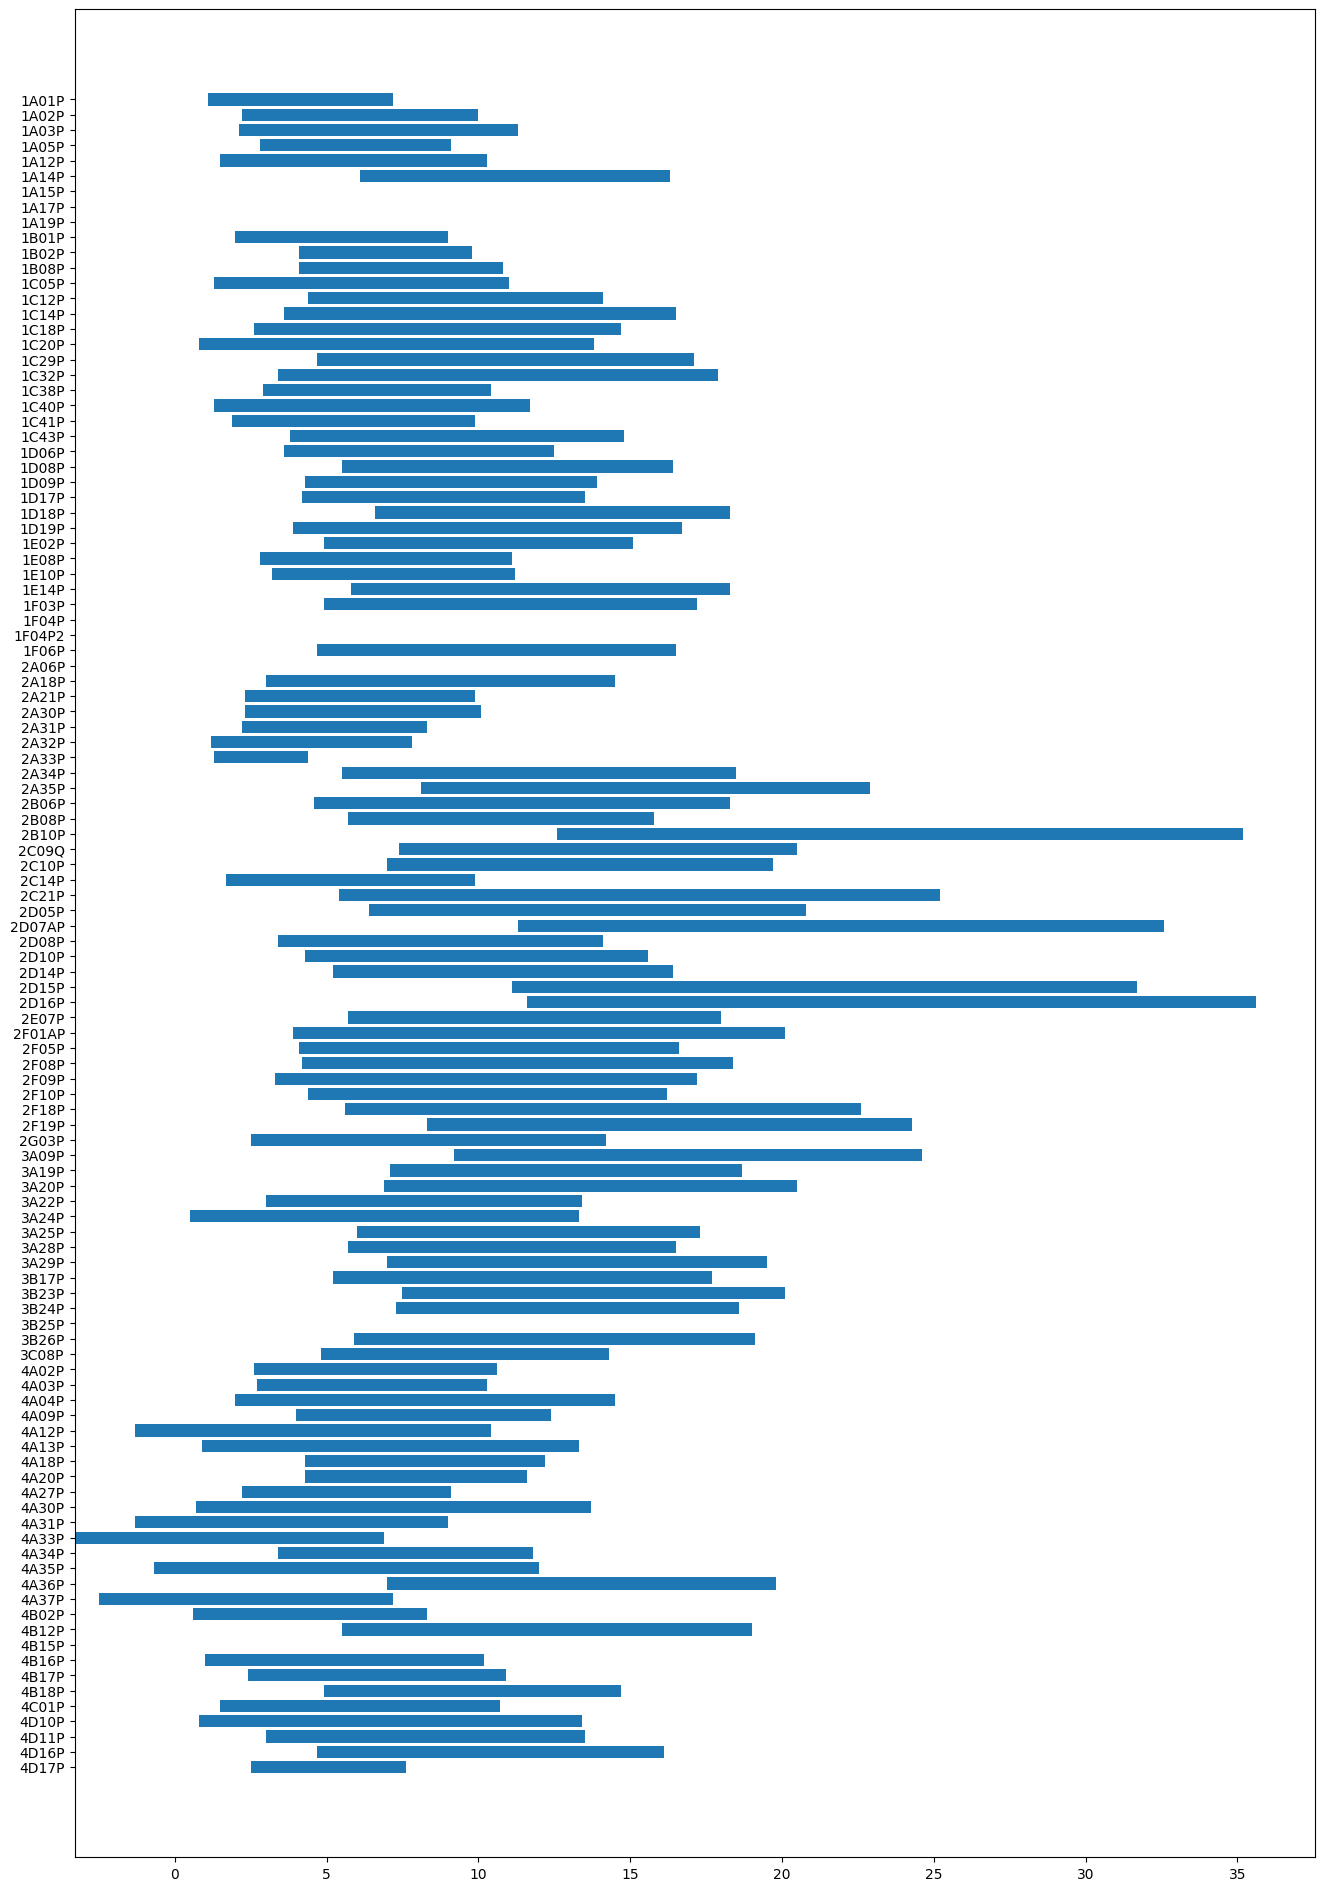

In [32]:
import matplotlib.pyplot as plt
import numpy

# graph the data for the specific day

# get the paths for 
print(r_data_path)
df = pd.read_csv(r_data_path,
                 parse_dates=['DATE'],
                 encoding="ISO-8859-1")
df[df == 99999] = numpy.nan
# plots the min max plot
#plt = df.plot(x='SITE', y='MAXT', figsize=(20,10))
#plt.fill_between(x='SITE',y1='MAXT',y2='MINT', data=df)

# by='SITE',
#x="variable"
# ['MAXT', 'MINT']
#plot = df.boxplot(x='MAXT', y='SITE'  , figsize=(20,10))

#fig = plt.figure(figsize = (10, 5))
#plt.bar(df['SITE'], df['MAXT'], color ='maroon',
#        width = 0.4)

fig, ax = plt.subplots(figsize =(16, 24))
ax.barh(df['SITE'], df['MAXT'], left=df['MINT'])
ax.invert_yaxis()
plt.show()

# fig, ax = plt.subplots(figsize=(16,8))
# # plot data
# ax.bar(
#     x = "SITE",
#     height = (df.top - df.bottom),
#     bottom = df.bottom,
#     color = '#9e7711'
# )


